**Isic 2024**

In [1]:
import tensorflow as tf 
from tensorflow.keras import layers 
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

2024-07-21 10:50:16.884362: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 10:50:16.884464: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 10:50:17.024063: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


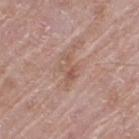

In [2]:
#show image :
from PIL import Image 
image_url="/kaggle/input/isic-2024-challenge/train-image/image/ISIC_0015670.jpg"
Image.open(image_url)



In [3]:
#check img size 
print((Image.open(image_url)).size)

(139, 139)


In [4]:
image_size=224
batch_size=32
channels=3


In [5]:
data_folder = "/kaggle/input/isic-2024-challenge/train-image/image"

In [6]:
import pandas as pd

In [7]:
train_ds = pd.read_csv("/kaggle/input/isic-2024-challenge/train-metadata.csv")

In [8]:
train_ds.head()

isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx_5  \
0         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
1  IL_6727506     Benign  Benign     NaN     NaN     NaN     NaN   
2         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
3         NaN     Benign  Benign     NaN     NaN     NaN     NaN   
4         NaN     Benign  Benign     NaN     NaN     NaN     NaN   

   mel_mitotic_index  mel_thick_mm  tbp_lv_dnn_lesion_confidence  
0                NaN           NaN                     97.517282  
1                NaN           NaN                      3.141455  
2                NaN           NaN                     99.804040  
3                NaN           NaN                     99.989998  
4                NaN           NaN                     70.442510  

[5 rows x 55 columns]

In [9]:
train_ds.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

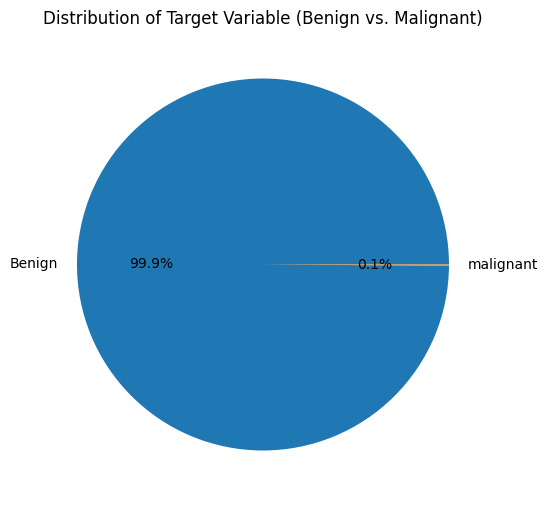

In [10]:
plt.figure(figsize= (6,8))
plt.pie(train_ds.target.value_counts(),labels = ['Benign', 'malignant'],autopct = "%1.1f%%",)
plt.title('Distribution of Target Variable (Benign vs. Malignant)')
plt.show()

In [11]:
train_ds.target.value_counts()

#--->The dataset is imbalanced it need to be handled 

target
0    400666
1       393
Name: count, dtype: int64

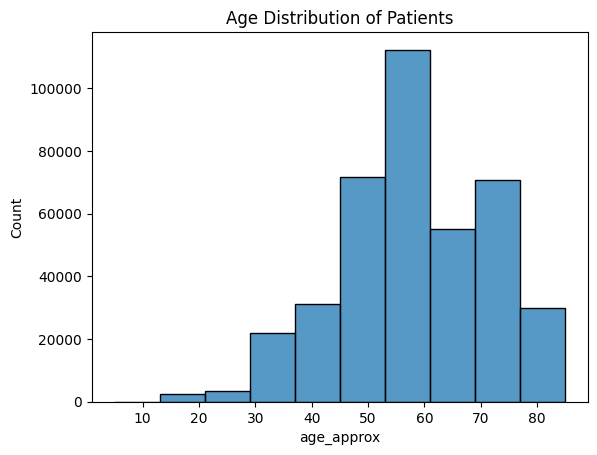

In [12]:
import seaborn as sns
sns.histplot(data=train_ds, x='age_approx',bins=10)
plt.title('Age Distribution of Patients')
plt.show()

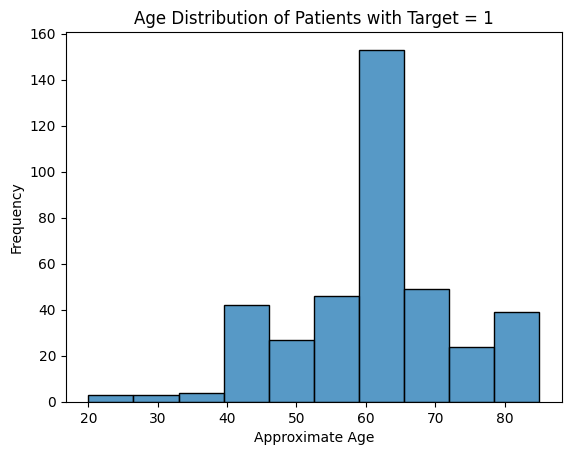

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset to include only rows where target equals 1
filtered_ds = train_ds[train_ds['target'] == 1]

# Plot the distribution of age_approx for patients with target equal to 1
sns.histplot(data=filtered_ds, x='age_approx', bins=10)
plt.title('Age Distribution of Patients with Target = 1')
plt.xlabel('Approximate Age')
plt.ylabel('Frequency')
plt.show()


### The distribution appears to be unimodal with a prominent peak at 60 years.

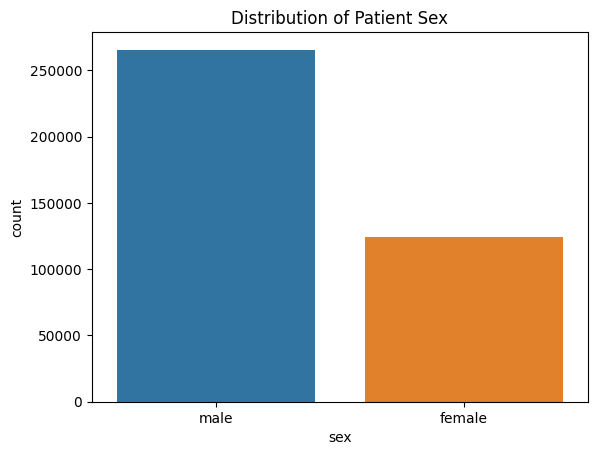

In [14]:
sns.countplot(data=train_ds, x='sex')
plt.title('Distribution of Patient Sex')
plt.show()

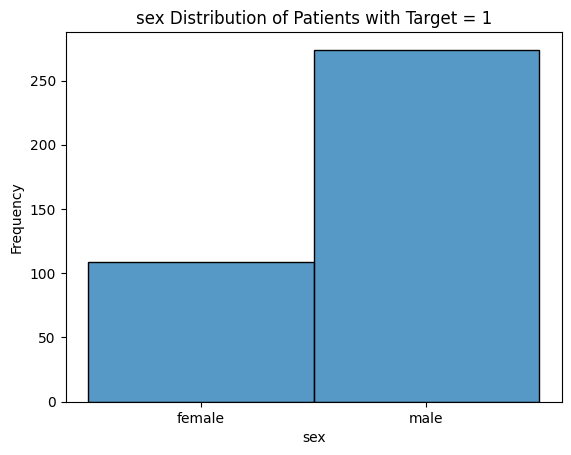

In [15]:
# Plot the distribution of age_approx for patients with target equal to 1
sns.histplot(data=filtered_ds, x='sex', bins=10)
plt.title('sex Distribution of Patients with Target = 1')
plt.xlabel('sex')
plt.ylabel('Frequency')
plt.show()


### here are significantly more male patients with target = 1 compared to female patients.

In [16]:
import plotly.express as px
sns.set_theme()
train_ds['age_group'] = pd.cut(train_ds['age_approx'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])
# Plot the distribution by target using Plotly
fig = px.histogram(train_ds, x='age_group', color='target', barmode='group', title='Age Group Distribution by Target')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Count',
    legend_title='Target'
)

# Show the plot
fig.show()

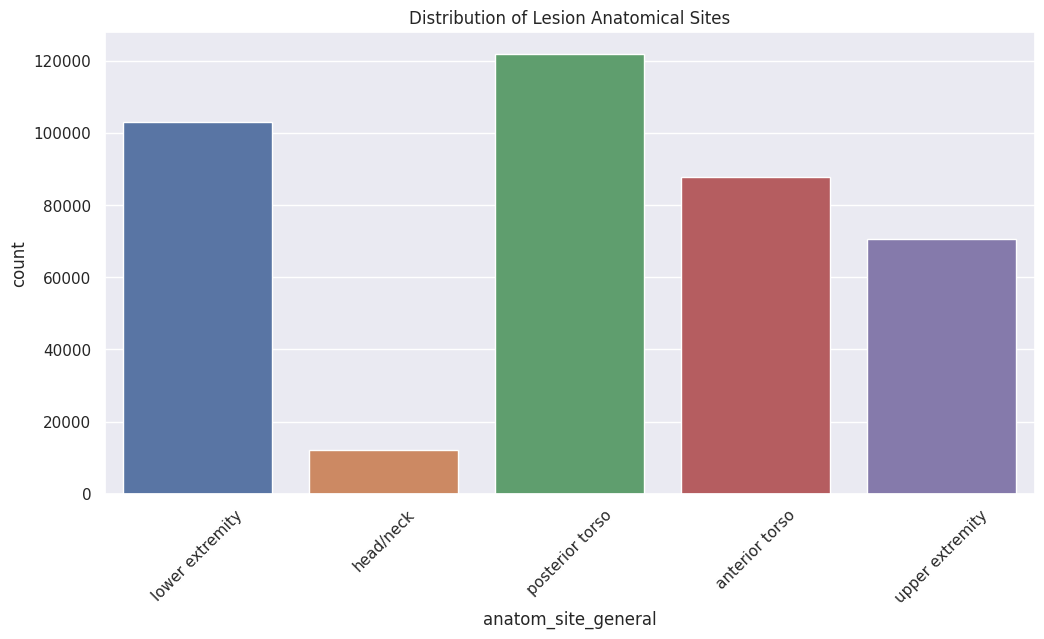

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_ds, x='anatom_site_general')
plt.title('Distribution of Lesion Anatomical Sites')
plt.xticks(rotation=45)
plt.show()

### As we can see, certain body parts are more susceptible to skin cancer. Recognizing this can help refine the model to prioritize those areas for more accurate detection.

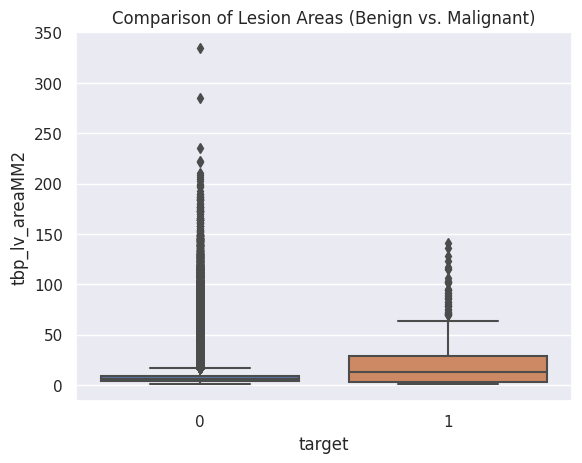

In [18]:
# Compare lesion areas between benign and malignant cases to identify any significant differences.
sns.boxplot(data=train_ds, x='target', y='tbp_lv_areaMM2')
plt.title('Comparison of Lesion Areas (Benign vs. Malignant)')
plt.show()


#### Difference in Spread : 
The spread of lesion areas is noticeably different between the two groups. Benign lesions have a wider spread, indicating more variability in size, while malignant lesions are more tightly distributed.
#### Potential Diagnostic Value:
The difference in lesion area distributions suggests that this feature could be potentially useful in distinguishing between benign and malignant cases. However, the presence of outliers in both groups highlights the importance of considering other clinical factors for accurate diagnosis.

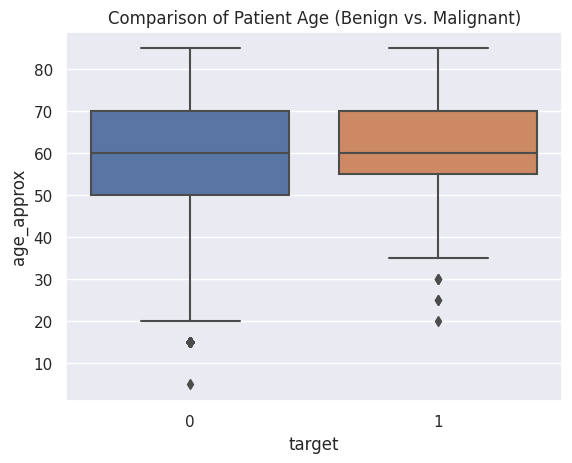

In [19]:
# Compare patient age between benign and malignant cases to identify any significant differences.
sns.boxplot(data=train_ds, x='target', y='age_approx')
plt.title('Comparison of Patient Age (Benign vs. Malignant)')
plt.savefig("age")
plt.show()

### Conclusion :

Malignant lesions typically exhibit larger sizes compared to benign lesions, which could serve as a significant diagnostic indicator. Additionally, older age seems to correlate with a greater probability of malignant lesions over benign ones, suggesting that age may be a risk factor for malignancy.

In [20]:
# to exclude category and object type 
train_ds.select_dtypes(exclude=['object','category'])

target  age_approx  clin_size_long_diam_mm   tbp_lv_A  tbp_lv_Aext  \
0            0        60.0                    3.04  20.244422    16.261975   
1            0        60.0                    1.10  31.712570    25.364740   
2            0        60.0                    3.40  22.575830    17.128170   
3            0        65.0                    3.22  14.242329    12.164757   
4            0        55.0                    2.73  24.725520    20.057470   
...        ...         ...                     ...        ...          ...   
401054       0        70.0                    6.80  22.574335    14.944666   
401055       0        60.0                    3.11  19.977640    16.026870   
401056       0        65.0                    2.05  17.332567    12.364397   
401057       0        30.0                    2.80  22.288570     9.564721   
401058       0        50.0                    3.30  16.792900    11.434730   

         tbp_lv_B  tbp_lv_Bext   tbp_lv_C  tbp_lv_Cext   tbp_lv_H  ...  \
0       26.922447    23.954773  33.684638    28.953117  53.058545  ...   
1       26.331000    24.549290  41.219030    35.299260  39.702910  ...   
2       37.970460    33.485410  44.174920    37.611800  59.265850  ...   
3       21.448144    21.121356  25.746200    24.374023  56.414429  ...   
4       26.464900    25.710460  36.217980    32.608740  46.946070  ...   
...           ...          ...        ...          ...        ...  ...   
401054  27.663259    26.767135  35.705132    30.656525  50.784168  ...   
401055  34.158840    31.011870  39.571870    34.908400  59.678970  ...   
401056  29.845326    26.500073  34.513206    29.242644  59.854275  ...   
401057  28.431200    27.012250  36.126360    28.655640  51.905420  ...   
401058  21.457220    21.214910  27.247270    24.100320  51.952470  ...   

        tbp_lv_radial_color_std_max  tbp_lv_stdL  tbp_lv_stdLExt  \
0                          0.000000     2.036195        2.637780   
1                          0.000000     0.853227        3.912844   
2                          0.000000     1.743651        1.950777   
3                          0.664690     1.258541        1.573733   
4                          0.000000     2.085409        2.480509   
...                             ...          ...             ...   
401054                     2.328066     7.054819        2.169398   
401055                     1.048147     1.879502        2.910780   
401056                     0.607554     1.702824        2.205272   
401057                     1.078204     3.680175        1.957157   
401058                     1.088073     3.068755        3.199104   

        tbp_lv_symm_2axis  tbp_lv_symm_2axis_angle    tbp_lv_x     tbp_lv_y  \
0                0.590476                       85 -182.703552   613.493652   
1                0.285714                       55   -0.078308  1575.687000   
2                0.361905                      105  123.649700  1472.010000   
3                0.209581                      130 -141.024780  1442.185791   
4                0.313433                       20  -72.315640  1488.720000   
...                   ...                      ...         ...          ...   
401054           0.288920                      100  147.187256  1182.317505   
401055           0.460000                       25   52.349740  1393.187000   
401056           0.183099                       40   54.622246  1065.263672   
401057           0.161850                      140   -9.861557   877.527000   
401058           0.197917                       45 -258.872300   148.606200   

          tbp_lv_z  mel_thick_mm  tbp_lv_dnn_lesion_confidence  
0       -42.427948           NaN                     97.517282  
1        57.174500           NaN                      3.141455  
2       232.908900           NaN                     99.804040  
3        58.359802           NaN                     99.989998  
4        21.428960           NaN                     70.442510  
...            ...        

In [21]:
# Create filtered correlation matrix by using a threshod
train_num = train_ds.select_dtypes(exclude=['object','category']).drop(columns= ['target','age_approx','tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z']).corr()
threshold = 0.4
filtered_corr_matrix = train_num[(train_num >= threshold) | (train_num <= -threshold)]

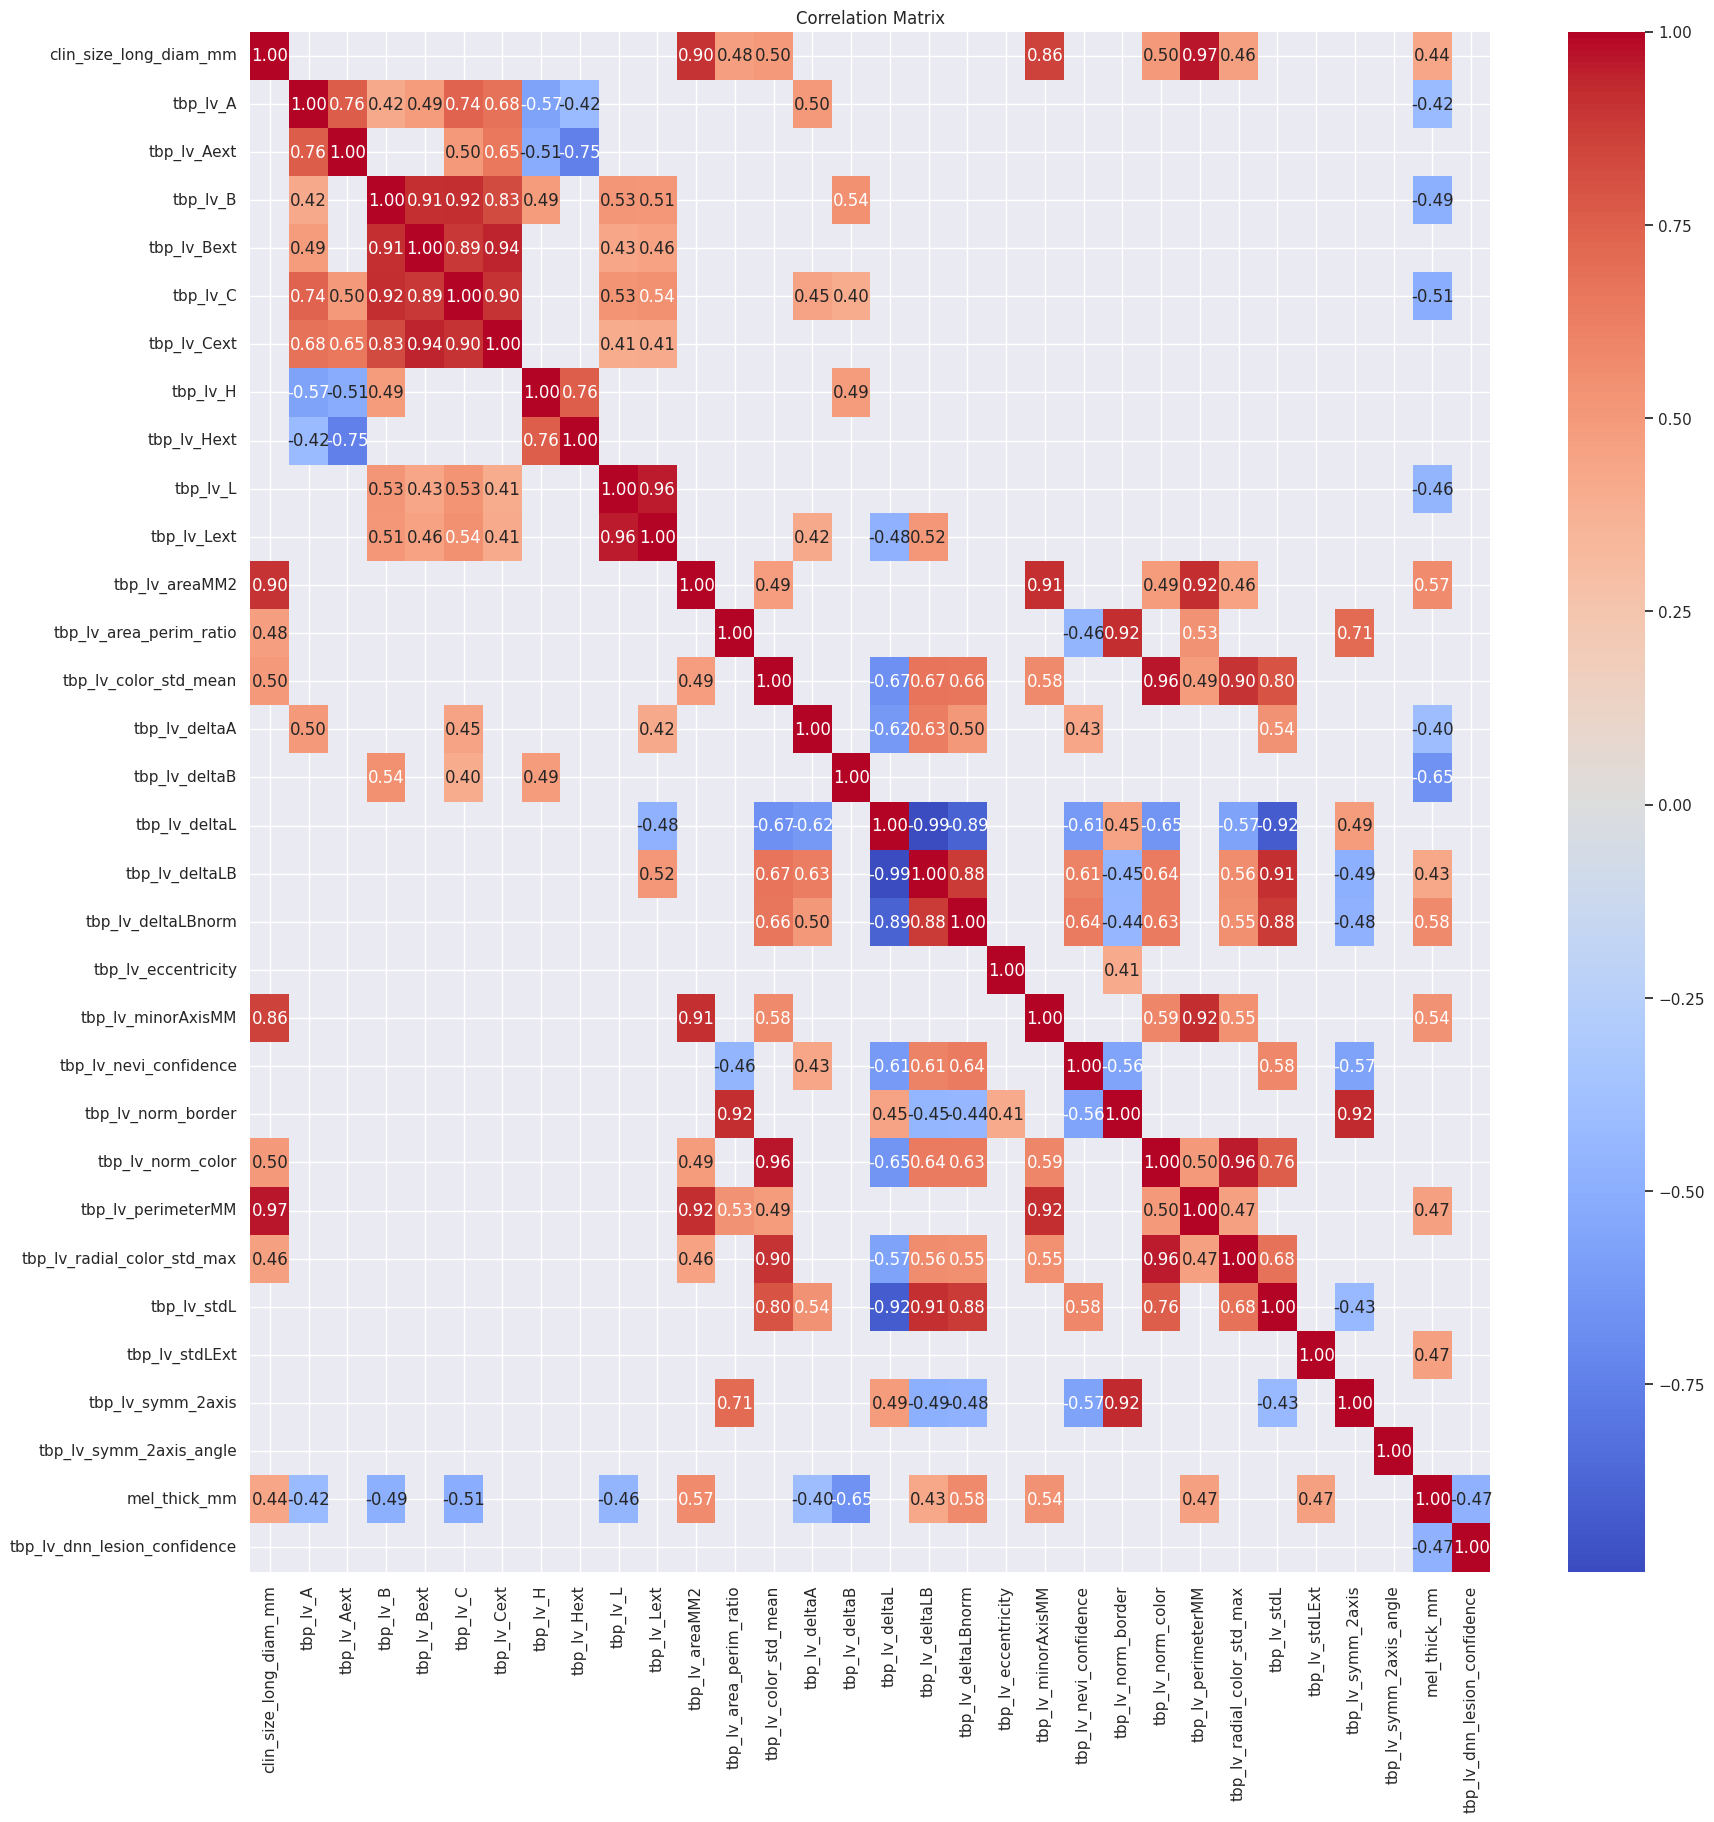

In [22]:
plt.figure(figsize=(20, 20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### The lesion areas are highly right-skewed, with the majority of areas being less than 50 mm².

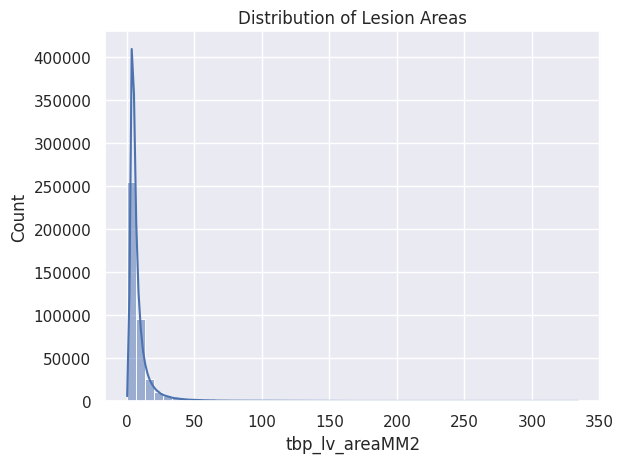

In [23]:
sns.histplot(data=train_ds, x='tbp_lv_areaMM2', bins=50, kde=True)
plt.title('Distribution of Lesion Areas')
plt.savefig("Lesion_areas")
plt.show()

Similarly, the lesion perimeters are also highly right-skewed, with most perimeters being less than 20 mm.
The perimeter and area distributions show that most lesions are small, but there are a few bigger ones.

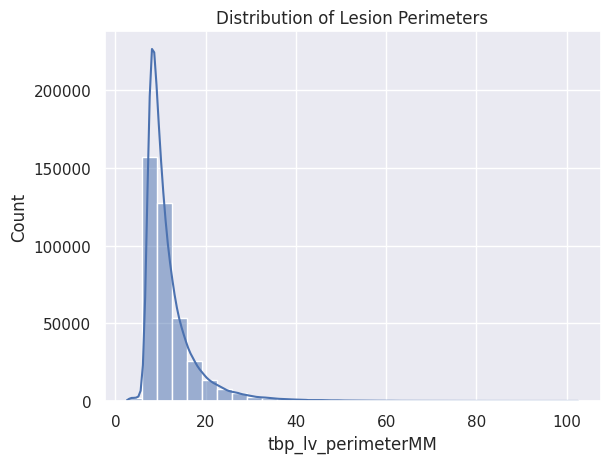

In [24]:
sns.histplot(data=train_ds, x='tbp_lv_perimeterMM', bins=30, kde=True)
plt.title('Distribution of Lesion Perimeters')
plt.savefig("Lesion_permiters")
plt.show()

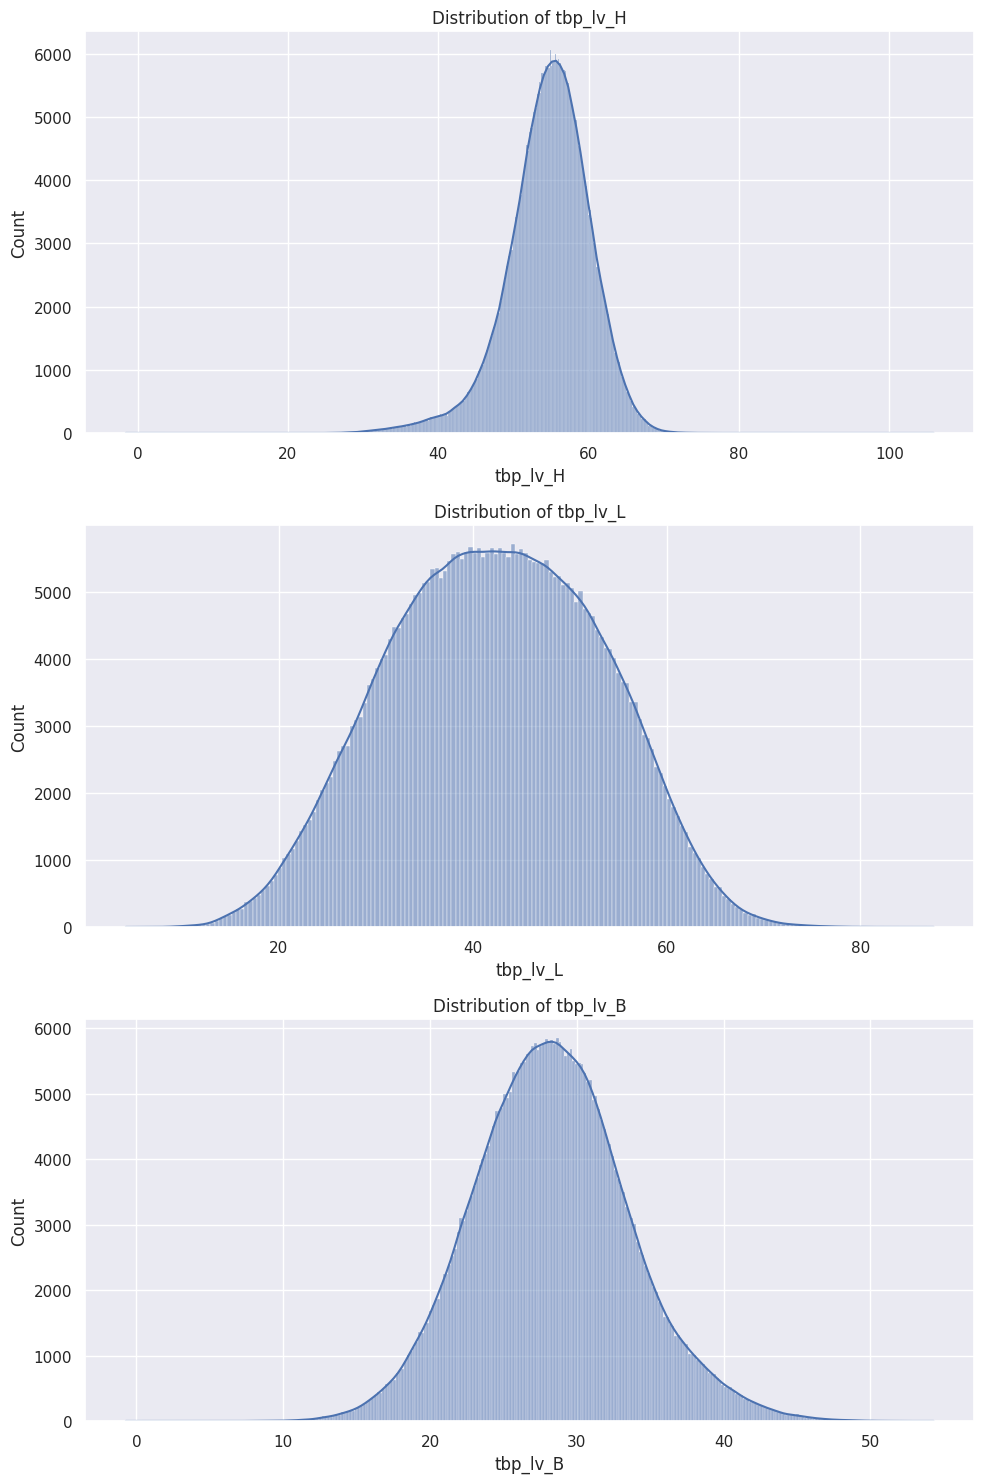

In [25]:
features = ['tbp_lv_H', 'tbp_lv_L', 'tbp_lv_B']
fig, axes = plt.subplots(len(features), 1, figsize=(10, 15))

for i, feature in enumerate(features):
    sns.histplot(data=train_ds, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.savefig('distribution')
plt.show()


The distributions of hue, lightness, and chroma suggest that the lesions have pretty consistent coloration, with most of them showing these values around the middle range.

## Extract images from hdf5 files

#### Each entry in the metadata file corresponds to an image in the dataset! In other words, the training metadata comes from the images in the training set.

In [26]:
import io
import cv2
import h5py
    


In [27]:
file_path="/kaggle/input/isic-2024-challenge/train-image.hdf5"
test_path="/kaggle/input/isic-2024-challenge/test-image.hdf5"

In [28]:
train_dataset=h5py.File(file_path, 'r')

In [29]:
images = {}
for image in train_dataset.keys():
    train_image = train_dataset[image]
    img_plt = Image.open(io.BytesIO(np.array(train_image)))
    img_array = np.array(img_plt)
    images[image] = img_array

In [30]:
print(len(images.keys()))

401059


In [31]:
images_label = list(images.keys())
images_array = list(images.values())

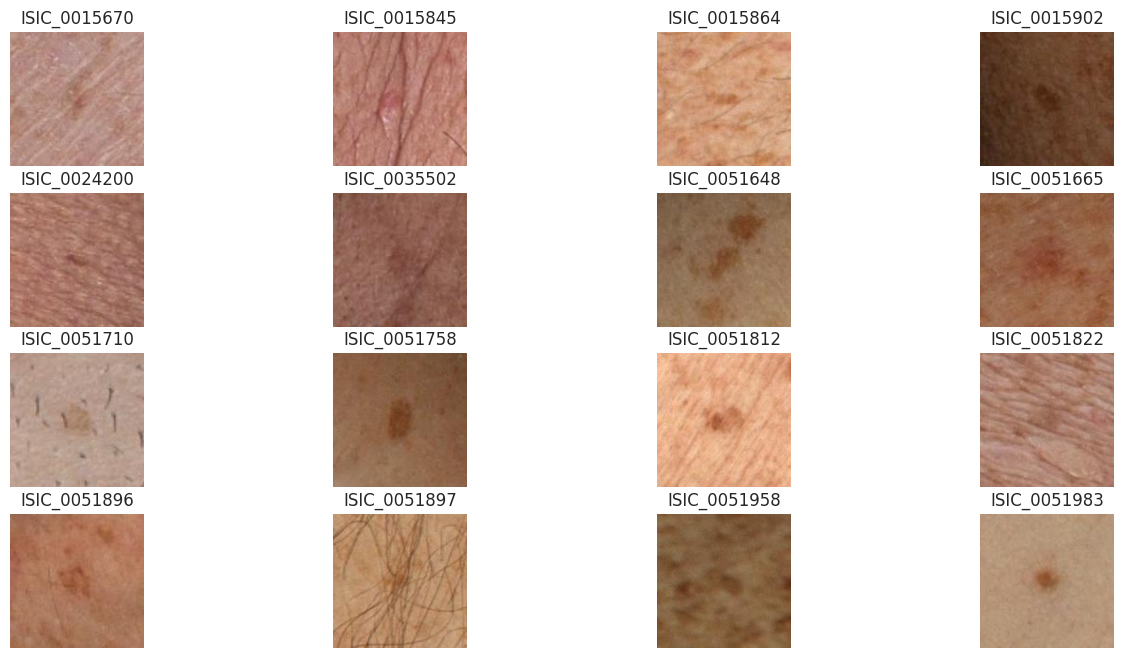

In [32]:
    plt.figure(figsize=(16, 8))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(images_array[i])
        plt.title(images_label[i])
        plt.axis('off')
    plt.show()

In [33]:
images_label[0]

'ISIC_0015670'

In [34]:
test_dataset = h5py.File(test_path, 'r')

In [35]:
test_images = {}
for image in test_dataset.keys():
    test_image = test_dataset[image]
    img_plt = Image.open(io.BytesIO(np.array(test_image)))
    img_array = np.array(img_plt)
    test_images[image] = img_array

In [36]:
print(len(test_images.keys()))

3


In [37]:
test_images_label = list(test_images.keys())
test_images_array = list(test_images.values())

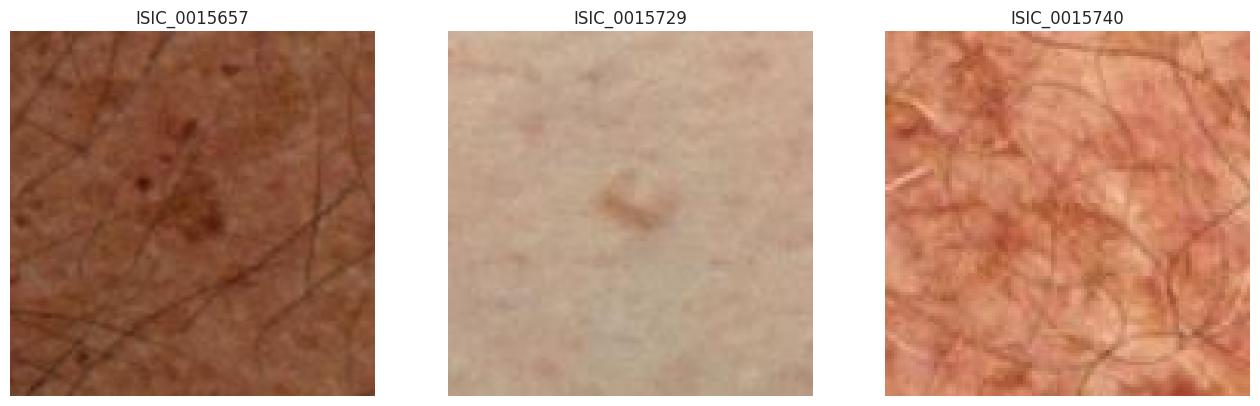

In [38]:
    plt.figure(figsize=(16, 8))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(test_images_array[i])
        plt.title(test_images_label[i])
        plt.axis('off')
    plt.show()

In [39]:
# Map targets to labels
#create a copy of dataset 
train_dss=train_ds.copy(deep=True)


# Create a dictionary for quick lookup
metadata_dict = train_dss.set_index('isic_id')['target'].apply(lambda x: 'malignant' if x == 1 else 'benign').to_dict()



In [40]:
# Map isic_id to labels
images_label = [metadata_dict.get(id, 'unknown') for id in images_label]
images_label[0]

'benign'

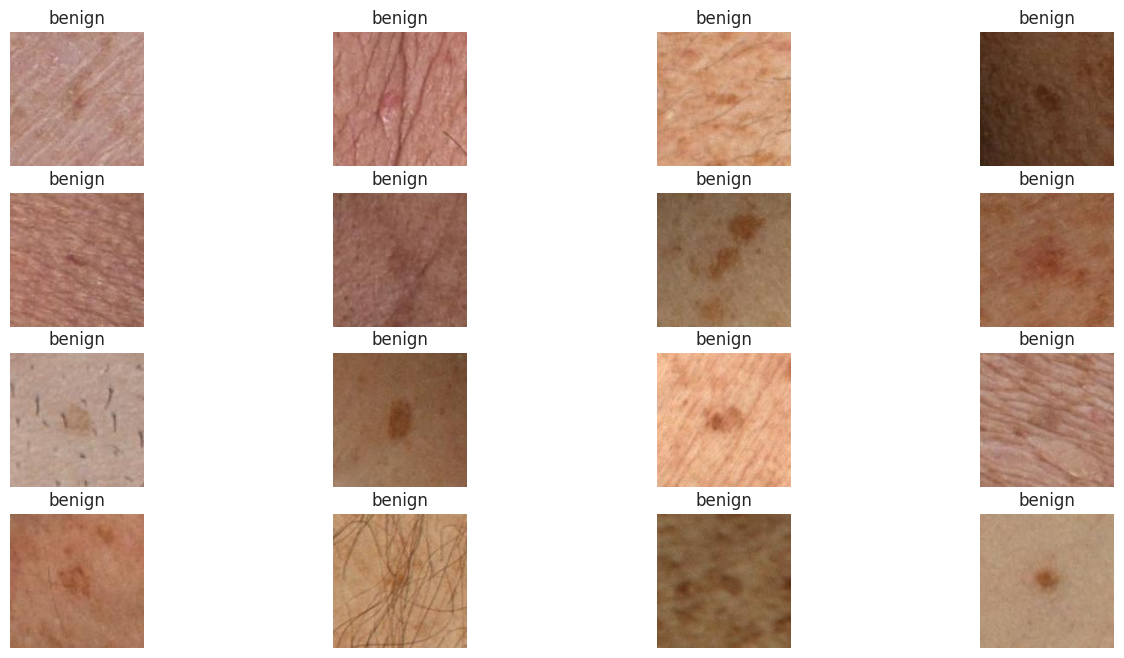

In [41]:
    plt.figure(figsize=(16, 8))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(images_array[i])
        plt.title(images_label[i])
        plt.axis('off')
    plt.show()

In [42]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GroupKFold
from lightgbm.callback import log_evaluation, early_stopping



In [43]:
target_col = 'target'
group_col = 'patient_id'

categorical_cols = [
    'tbp_lv_location_simple',
    'tbp_lv_location',
    'tbp_tile_type',
#     'image_type', 
    'attribution',
    'anatom_site_general',
    'sex',
    'copyright_license'
]

features_cols = [
    'age_approx',
    'sex',
    'anatom_site_general',
    'clin_size_long_diam_mm',
#     'image_type', 
    'tbp_tile_type',
    'tbp_lv_A',
    'tbp_lv_Aext',
    'tbp_lv_B',
    'tbp_lv_Bext',
    'tbp_lv_C',
    'tbp_lv_Cext',
    'tbp_lv_H',
    'tbp_lv_Hext',
    'tbp_lv_L',
    'tbp_lv_Lext',
    'tbp_lv_areaMM2',
    'tbp_lv_area_perim_ratio',
    'tbp_lv_color_std_mean',
    'tbp_lv_deltaA',
    'tbp_lv_deltaB',
    'tbp_lv_deltaL',
    'tbp_lv_deltaLBnorm',
    'tbp_lv_eccentricity',
    'tbp_lv_location',
    'tbp_lv_location_simple',
    'tbp_lv_minorAxisMM',
    'tbp_lv_nevi_confidence',
    'tbp_lv_norm_border',
    'tbp_lv_norm_color',
    'tbp_lv_perimeterMM',
    'tbp_lv_radial_color_std_max',
    'tbp_lv_stdL',
    'tbp_lv_stdLExt',
    'tbp_lv_symm_2axis',
    'tbp_lv_symm_2axis_angle',
    'tbp_lv_x',
    'tbp_lv_y',
    'tbp_lv_z',
    'attribution',
    'copyright_license',
]

In [44]:
# Separating features and target
X = train_ds[features_cols].copy()  # Making a copy to avoid modifying the original dataframe
y = train_ds[target_col]
groups = train_ds[group_col]

# Encoding categorical features with LabelEncoder
category_encoder = OrdinalEncoder(
    categories='auto',
    dtype=int,
    handle_unknown='use_encoded_value',
    unknown_value=-2,
    encoded_missing_value=-1,
)

X_cat = category_encoder.fit_transform(X[categorical_cols])
for c, cat_col in enumerate(categorical_cols):
    X[cat_col] = X_cat[:, c]

In [45]:
X_cat

array([[ 4, 12,  1, ...,  2,  1,  1],
       [ 0,  0,  1, ...,  1,  1,  1],
       [ 5, 16,  0, ...,  3,  1,  1],
       ...,
       [ 6, 19,  0, ...,  0,  0,  1],
       [ 6, 18,  0, ...,  0,  0,  2],
       [ 2,  5,  0, ...,  2,  1,  1]])

In [46]:

# Preparing the image path
image_path = "/kaggle/input/isic-2024-challenge/train-image/image"
train_ds["filepath"] = train_ds["isic_id"].apply(lambda x: f"{image_path}/{x}.jpg")

In [47]:
train_ds["filepath"]

0         /kaggle/input/isic-2024-challenge/train-image/...
1         /kaggle/input/isic-2024-challenge/train-image/...
2         /kaggle/input/isic-2024-challenge/train-image/...
3         /kaggle/input/isic-2024-challenge/train-image/...
4         /kaggle/input/isic-2024-challenge/train-image/...
                                ...                        
401054    /kaggle/input/isic-2024-challenge/train-image/...
401055    /kaggle/input/isic-2024-challenge/train-image/...
401056    /kaggle/input/isic-2024-challenge/train-image/...
401057    /kaggle/input/isic-2024-challenge/train-image/...
401058    /kaggle/input/isic-2024-challenge/train-image/...
Name: filepath, Length: 401059, dtype: object

In [48]:
import cv2

def read_image(filepath):
    return cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)

def display_images(image_paths, nrows=5, ncols=5):
    assert len(image_paths) == nrows * ncols, "Lengths don't match."
    images = [read_image(image_path) for image_path in image_paths]
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 10))
    axes = axes.ravel()
    for image, ax in zip(images, axes):
        ax.imshow(image)
        ax.axis("off")
    plt.show()

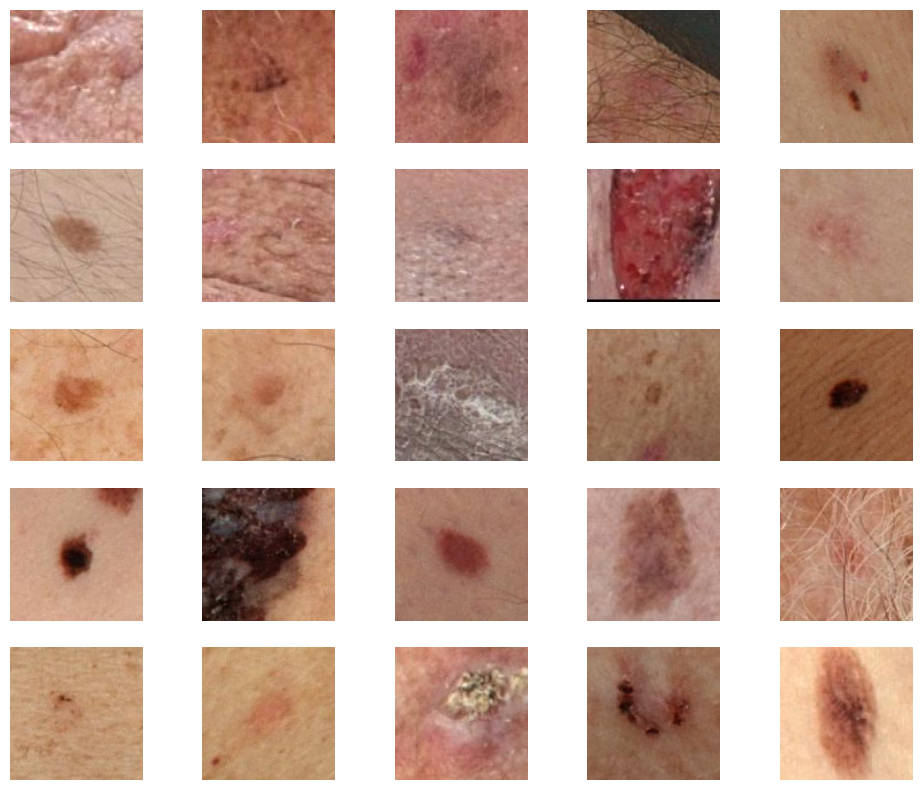

In [49]:
sample_image_paths = train_ds[train_ds["target"] == 1].sample(25, random_state=42)["filepath"].values
display_images(sample_image_paths)